In [233]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import text_processing
import utils
import tf_idf
import requests

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Wilde Ride - A Literary Analysis of Oscar Wilde's Corpus
##### Jessica Brown and Lauren Nalajala
## Background
Talk about Oscar Wilde's life here (add image for timeline of his life?)

And the goal of this project here

## Question
State research question
### Motivation

## Intial Text Processing
Talk about getting the data, processing it (ie. what we removed)

In [234]:
#Add timeline image here

And the goal of this project here

## Intial Text Processing
We gathered all of our data from Project Gutenberg by scraping. First, we made a list of the urls and title as strings of the Oscar Wilde works we wished to analyze (`ow_corpus_list`).

In [1]:
ow_corpus_list = [("https://www.gutenberg.org/files/773/773-0.txt", "Lord Arthur Savile's Crime and Other Short Stories"),
("https://www.gutenberg.org/cache/epub/902/pg902.txt", "The Happy Prince and Other Short Stories"),
("https://www.gutenberg.org/cache/epub/174/pg174.txt", "The Picture of Dorian Grey"),
("https://www.gutenberg.org/cache/epub/42704/pg42704.txt", "Salome"),
("https://www.gutenberg.org/files/873/873-0.txt", "A House of Pomegranates"),
("https://www.gutenberg.org/files/875/875-0.txt", "The Ducchess of Padua"),
("https://www.gutenberg.org/files/1017/1017-0.txt", "The Soul of Man Under Socialism"),
("https://www.gutenberg.org/files/790/790-0.txt", "Lady Windermeres Fan"),
("https://www.gutenberg.org/files/854/854-0.txt", "A Woman of No Importance"),
("https://www.gutenberg.org/files/844/844-0.txt", "The Importance of Being Earnest"),
("https://www.gutenberg.org/cache/epub/301/pg301.txt", "The Ballad of Reading Gaol"),
("https://www.gutenberg.org/files/885/885-0.txt", "An Ideal Husband")]


To retrieve and process this data, we wrote functions in the file `text_processing.py`. First, we ran `get_data_from_book` for "Lord Arthur Savile's Crime". This takes a url and title and returns a list of words that appear in the text. It also creates a .txt file with the same name as the title passed through it, and writes the same text to it. However, this text also has some encoding marks, so we run `remove_encoding_marks`. This removes the first word of the text (which is Project Gutenburg's extraneous text), any "\r\n" combinations, and empty strings.

In [236]:
lasc_raw = text_processing.get_data_from_book(ow_corpus_list[11][0], ow_corpus_list[11][1])
lasc_encode = text_processing.remove_encoding_marks(lasc_raw)
print(lasc_encode)

['project', 'gutenberg', 'ebook', 'of', 'an', 'ideal', 'husband,', 'by', 'oscar', 'wilde', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'you', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www.gutenberg.org.', 'if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states,', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'ebook.', 'title:', 'an', 'ideal', 'husband', '', 'a', 'play', 'author:', 'oscar', 'wilde', 'release', 'date:', 'april,', '1997', '[ebook', '#885]', '[most', 'recently', 'updated:', 'june', '7,', '2021]', 'language:', 'english', '

As mentioned about, the text retrieved from Project Gutenberg's website includes introductions and closing statements that are not part of the original text, as well as a table of contents. In order to remove these, we use `remove_extra_text`, which removes this extraneous text as well as a given .csv file of common words (in this case, we use the top 200 most popular English language words). We do this by defining a "start word" and "end word", which are words we want the text to start and end at.

In [237]:
lasc_text_only = text_processing.remove_extra_text(lasc_encode, 'chapter', '\r\n\r\n***end')

ValueError: 'chapter' is not in list

We will also create a dictionary of start and end words for the other texts.

In [ ]:
ow_start_end_words_dict = {"Lord Arthur Savile's Crime and Other Short Stories": ('chapter', '\r\n\r\n***end'),
                           "The Happy Prince and Other Short Stories": ('high', '\r\n\r\n***'),
                           "The Picture of Dorian Grey": ('chapter', '\r\n\r\n***'),
                           "Salome": ('\r\n\r\nproduced', 'lampe]'),
                           "A House of Pomegranates": ('sarawak]', '\r\n\r\n***end'),
                           "The Ducchess of Padua": ('noon_;', '\r\n\r\n***end'),
                           "The Soul of Man Under Socialism": ('\r\n\r\nthe', '\r\n\r\n***end'),
                           "Lady Windermeres Fan": ('fifteenth', '\r\n\r\n***'),
                           "A Woman of No Importance": ('***', '\r\n\r\n***'),
                           "The Importance of Being Earnest": ('***', '\r\n\r\n***'),
                           "The Ballad of Reading Gaol": ('***', '301.txt'),
                           "An Ideal Husband": ('methuen', '\r\n\r\n***')}

Finally, we will remove extraneous punctuation marks and titles with `remove_punctuation` and `remove_titles`, respectively. We will also use `remove_character_names` to remove the names of the main characters, which takes a tuple consisting of character names.

In [ ]:
lasc_characters = ('windermere', 'arthur', 'savile', 'podgers', 'clementina', 'sybil', 'otis', 'canterville', 'washington', 'virginia', 'umney', 'simon', 'eleanor', 'murchinson', 'alan', 'trevor', 'alroy', 'hughie', 'erskine', 'laura', 'merton')
lasc = text_processing.remove_character_names(text_processing.remove_titles(text_processing.remove_punctuation(lasc_text_only)), lasc_characters)

This leaves us with an edited list of words in a given text (in this case, Lord Arthur Sevile's Crime). With this data, we can analyze Wilde's word usage in this text. However, in order to analyze multiple texts, we must import multiple texts. To do this, we will first create `character_dict`, which maps texts to a tuple of characters in that text. Then, we will use `initial_text_processing` on each text, which will perform all the operations we've done above.

In [ ]:
character_dict = {"Lord Arthur Savile's Crime and Other Short Stories": ('windermere', 'arthur', 'savile', 'podgers', 'clementina', 'sybil', 'otis', 'canterville', 'washington', 'virginia', 'umney', 'simon', 'eleanor', 'murchinson', 'alan', 'trevor', 'alroy', 'hughie', 'erskine', 'laura', 'merton'),
                           "The Happy Prince and Other Short Stories": ("happy", 'prince', 'swallow', 'student', 'nightingale', 'giant', 'hans', 'miller', 'rocket'),
                           "The Picture of Dorian Grey": ('dorian', 'basil', 'wolton', 'james', 'gray', 'hallward', 'sibyl', 'vane', 'campbell', 'fermor', 'singleton', 'victoria'),
                           "Salome": ('herod', 'judea', 'tigellinus', 'salome', 'antipas', 'jokanaan', 'herodius'),
                           "A House of Pomegranates": ('young', 'dwarf', 'fisherman', 'soul', 'king', 'infanta', 'mermaid', 'star-child'),
                           "The Ducchess of Padua": ('simone', 'andrea', 'taddeo', 'moranzano', 'gesso', 'maffio', 'guido', 'bernardo', 'beatrice', 'jeppo', 'ascanio', 'ugo', 'lucia'),
                           "The Soul of Man Under Socialism": ("",),
                           "Lady Windermeres Fan": ('windermere', 'lorton', 'dumby', 'agatha', 'darlington', 'cecil', 'hopper', 'carlisle', 'augustus', 'graham', 'parker', 'plymdale'),
                           "A Woman of No Importance": ('illingworth', 'john', 'pontefrac', 'alfred', 'rufford', 'kelvil', 'garld', 'arbuthnot'),
                           "The Importance of Being Earnest": ('john', 'worthington', 'algernon', 'moncrieff', 'bracknell', 'gwendolen', 'fairfax'),
                           "The Ballad of Reading Gaol": ("",),
                           "An Ideal Husband": ('caversham', 'viscount', 'goring', 'robert', 'chiltern', 'vicomte', 'montford', 'pipps', 'mason', 'james')}

lord_arthur_saviles_crimes = text_processing.initial_text_processing(0, ow_corpus_list, ow_start_end_words_dict, character_dict)
the_happy_prince = text_processing.initial_text_processing(1, ow_corpus_list, ow_start_end_words_dict, character_dict)
dorian_grey = text_processing.initial_text_processing(2, ow_corpus_list, ow_start_end_words_dict, character_dict)
salome = text_processing.initial_text_processing(3, ow_corpus_list, ow_start_end_words_dict, character_dict)
house_of_pomegranates = text_processing.initial_text_processing(4, ow_corpus_list, ow_start_end_words_dict, character_dict)
ducchess_of_padua = text_processing.initial_text_processing(5, ow_corpus_list, ow_start_end_words_dict, character_dict)
the_soul_under_socialism = text_processing.initial_text_processing(6, ow_corpus_list, ow_start_end_words_dict, character_dict)
lady_windermeres_fan = text_processing.initial_text_processing(7, ow_corpus_list, ow_start_end_words_dict, character_dict)
a_woman_of_no_importance = text_processing.initial_text_processing(8, ow_corpus_list, ow_start_end_words_dict, character_dict)
importance_of_being_earnest = text_processing.initial_text_processing(9, ow_corpus_list, ow_start_end_words_dict, character_dict)
reading_gaol = text_processing.initial_text_processing(10, ow_corpus_list, ow_start_end_words_dict, character_dict)
ideal_husband = text_processing.initial_text_processing(11, ow_corpus_list, ow_start_end_words_dict, character_dict)

## Word Usage
First, we decided to analyze the frequency of different words across several books. In our initial attempts to do this, we plotted the most common words in the text, without any of the processing detailed above. Unfortunately, that resulted in this plot (using 'Lord Arthur Savile's Crime', 'The Importance of Being Earnest', and 'An Ideal Husband" as examples).

/home/jes-bro/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jes-bro/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


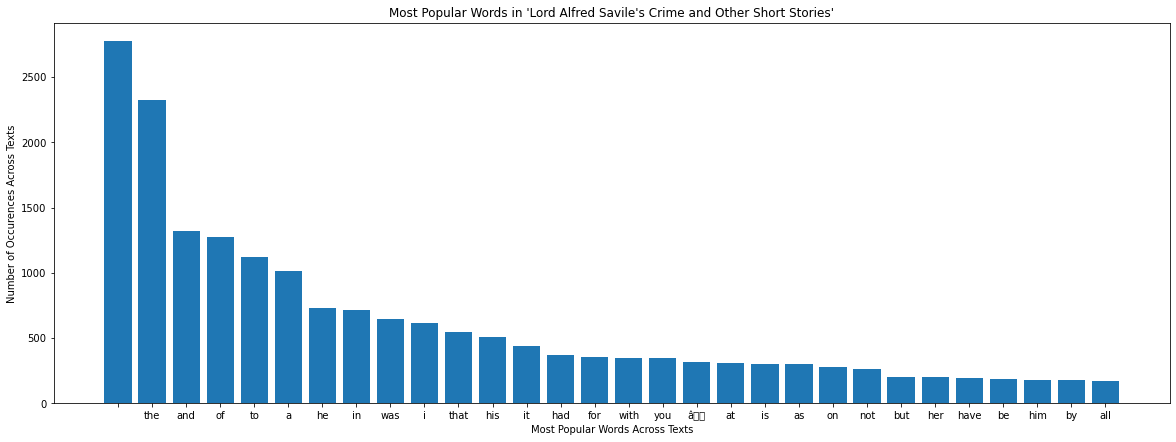

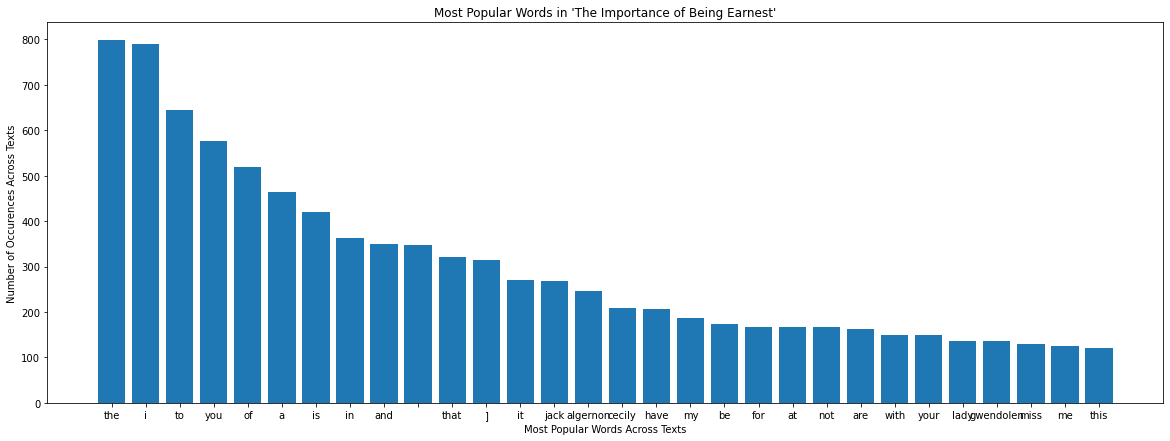

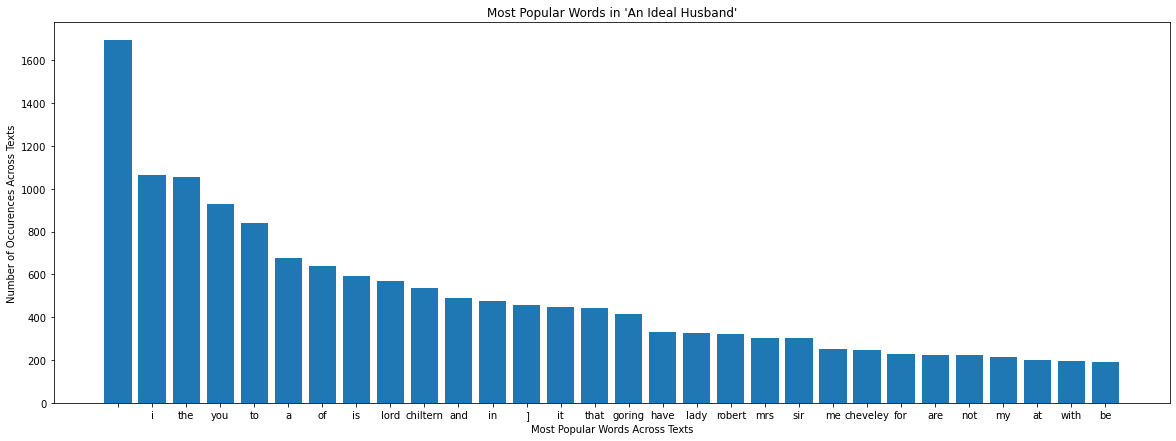

In [3]:
from utils import plot_most_freq_words_texts
from plotting import plot_freq_bar_one_book

lasc_freqs = plot_most_freq_words_texts([ow_corpus_list[0]], 30)
plot_freq_bar_one_book(lasc_freqs, "Most Popular Words in \'Lord Alfred Savile\'s Crime and Other Short Stories\'")
earnest_freqs = plot_most_freq_words_texts([ow_corpus_list[9]], 30)
plot_freq_bar_one_book(earnest_freqs, "Most Popular Words in \'The Importance of Being Earnest\'")
husband_freqs = plot_most_freq_words_texts([ow_corpus_list[11]], 30)
plot_freq_bar_one_book(husband_freqs, "Most Popular Words in \'An Ideal Husband\'")

As you can see, these lists are dominated by common words like "the" and "and". Two are also led by the empty string. There are also extraneous characters that are obviously part of the formatting and not the words in the text itself. Some titles are visible, and the names of certain characters are show up. As a result, we decided to perform the processing operations described above.

Although this data does not provide much use for analyzing the mood of Wilde's writing at the time, it is interesting to note that "he/him/his" pronouns generally appear more frequently than "she/her/hers" pronouns.

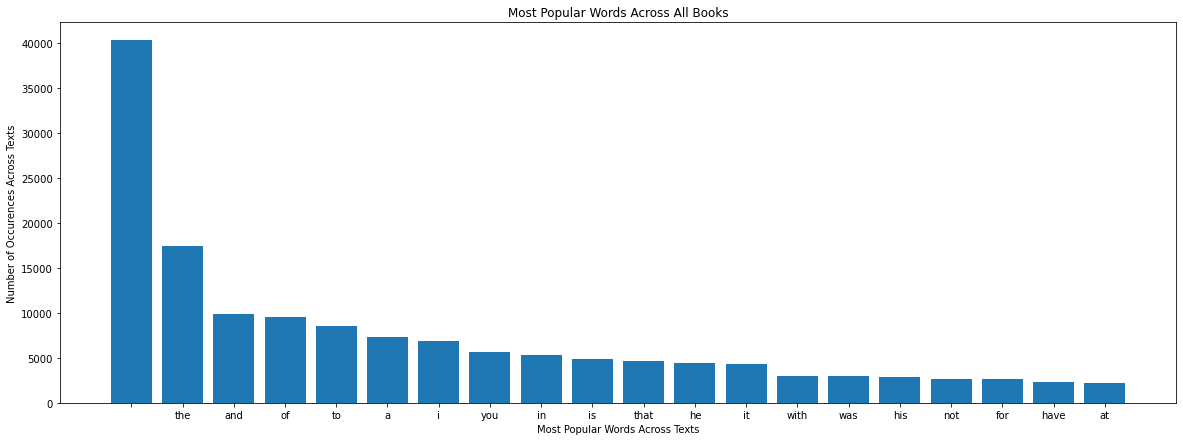

In [4]:
# Plot of most popular words across all books, in descending order from left to right
from plotting import plot_freq_bar
num_data_pts = 20
freqs = plot_most_freq_words_texts(ow_corpus_list, num_data_pts)
plot_freq_bar(freqs)

Analyze most commonly used words here
## How Verbose was Oscar Wilde Over Time? Why Might his verbosity have changed? 
### Average Sentence Length Across All Books
Wilde's word choice was not the only metric we chose to analyse. We also determined the average length of his sentences in each of the texts, which we plotted below.

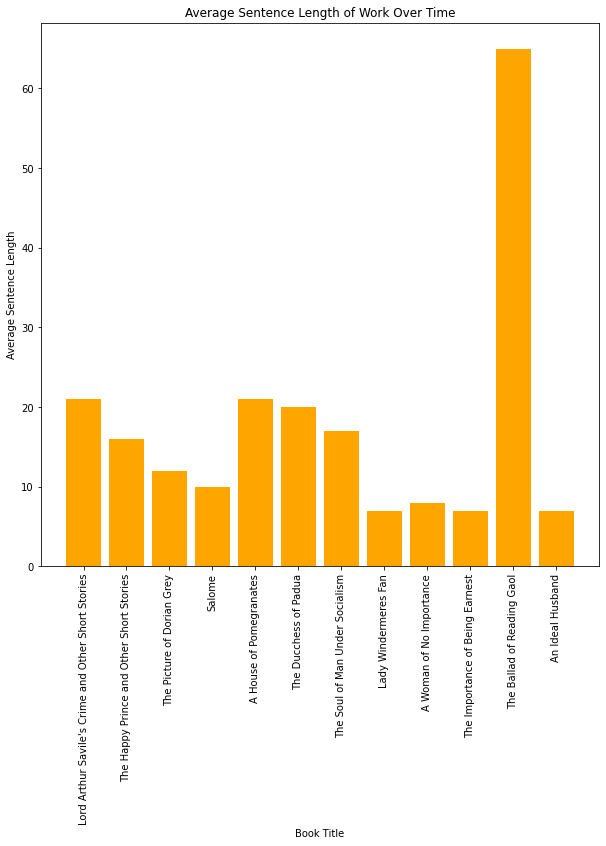

In [5]:
from utils import get_avg_sentence_length
from plotting import plot_avg_sentence_lengths_all_books
sentence_lengths = get_avg_sentence_length(ow_corpus_list)
plot_avg_sentence_lengths_all_books(sentence_lengths)

Just from looking at this plot, it is easy to see that "The Ballad of Reading Gaol" is an outlier. This is because it was the only poem out of the texts we analyzed, so the change in form may have influenced choice of sentence length. Otherwise, the average sentence length hovers between 5 and 25 words. Initially, Wilde's sentence length decreases until it reaches a low in "Salome", which was intially written in French before being translated to English. Then, it spikes back up with "A House of Pomegranates" before decreasing again. Interestingly, his most popular work at the time - "The Importance of Being Earnest" had the second-shortest sentences, only beat in terms of brevity by his last play, "An Ideal Husband".

## What counts as an alliterative sequence?
We decided to define an alliterative sequence as two consecutive words in the same sentence that have the same starting phoneme, or sound. 
We decided not to do words with spacing in between them due to time constraints. Using this definition, we calculated the occurences of alliteration based on different phenomes, and made word clouds of the most frequently used alliterative words and some sample alliterative pairings. This information is plotted below for three different novels.

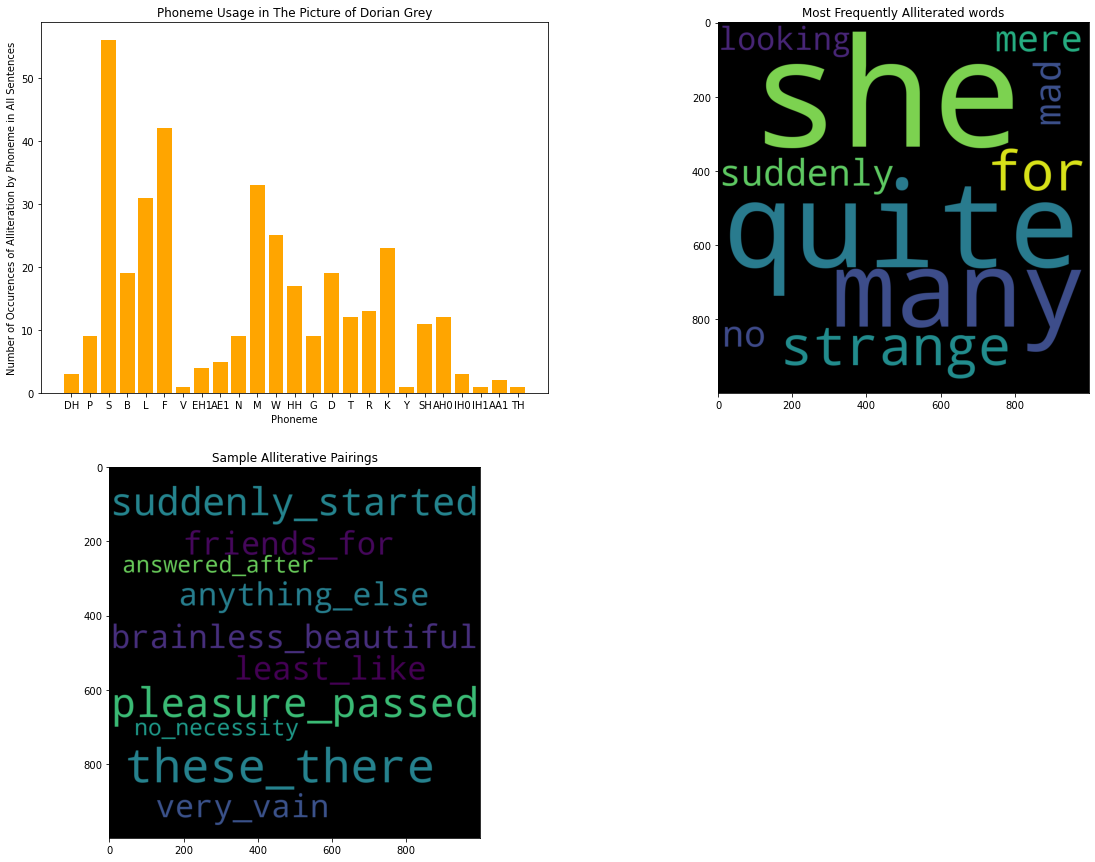

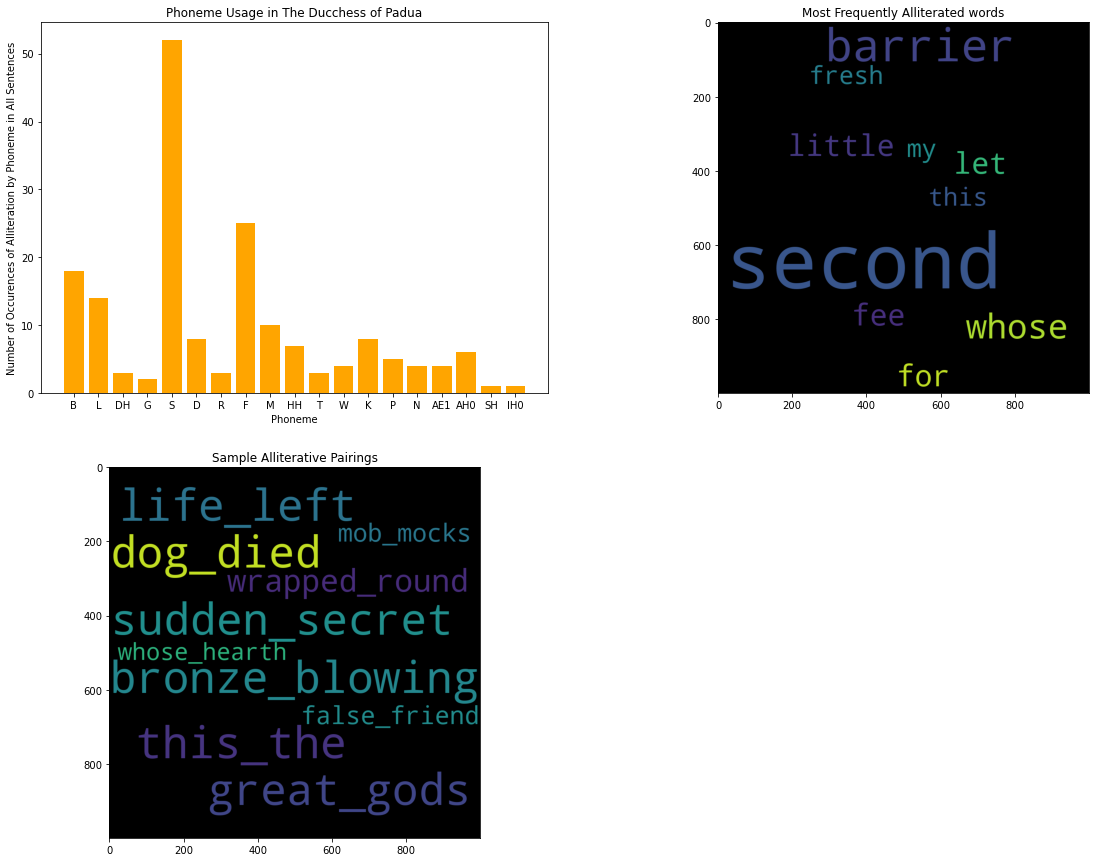

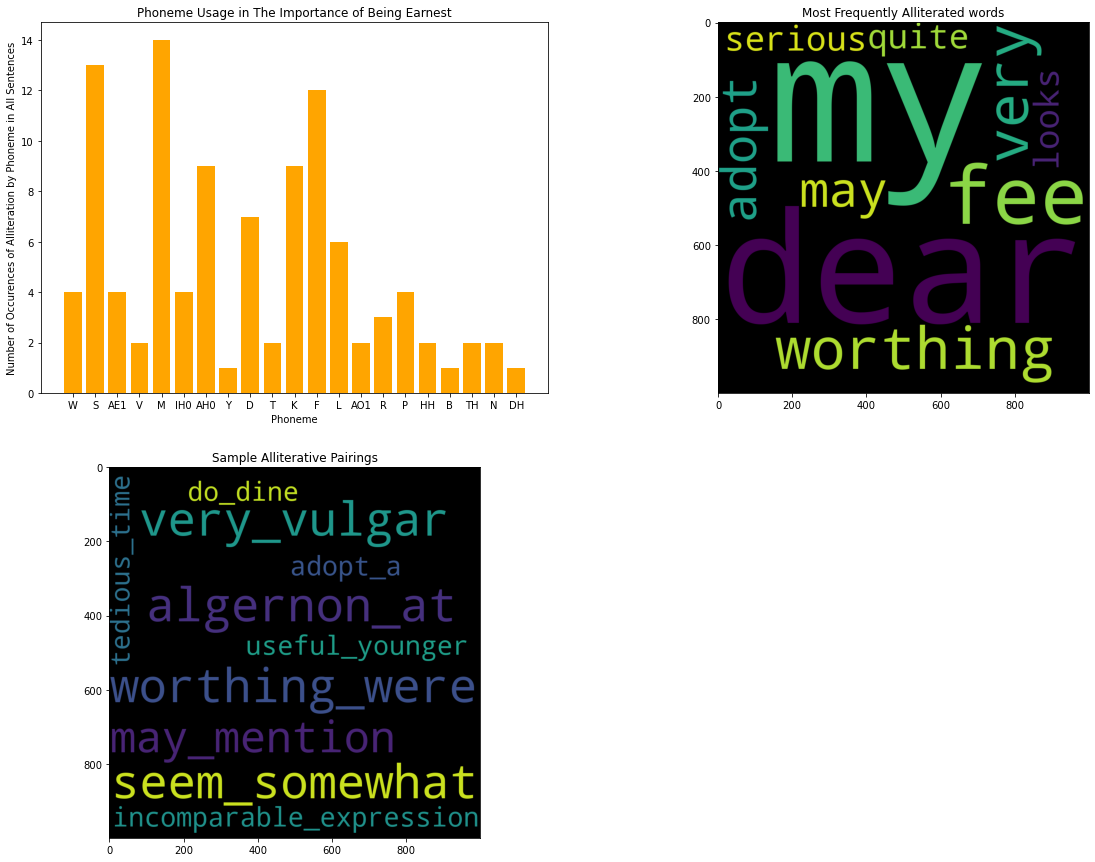

In [2]:
from plotting import get_all_alliteration_by_phoneme
get_all_alliteration_by_phoneme([ow_corpus_list[2], ow_corpus_list[5], ow_corpus_list[9]])

Since alliteration is most commonly used to draw attention to certain word choices, it is interesting to note the words that are alliterated with. Whether they were intentional or unintentional on Wilde's part, these alliterative words and pairings would have stood out to his audience. From these three texts, we can see that Wilde frequently alliterates on the s phenome, and that he used alliteration much more frequently in "The Portrait of Dorian Grey" and "A House of Pomegranates" than in "The Importance of Being Earnest". The last of these three is a comedy - perhaps he was less focused on flowery language?

The alliterative phrases also point to key events in the texts and in his life. In Dorian Grey, he uses alliterative words and phrases like "looking", "brainless_beautiful", and "very_vain", which connect back to the novel's themes of beauty and goodness. Phrases like "strange" and "pleasure_passed" also invoke the off-beat, hedonistic nature of the novel that made it so unpopular at the time.

In comparison, the alliterative phrases in "The Ducchess of Padua" invoke symbolism more similar to royalty and gods. Wilde uses alliterative phrases like "great gods", "whose hearth", and "bronze-blowing", which bring to mind riches and power. In contrast, this work also has alliterative phrases with much more negative connotations, such as "sudden secret", "false friend", "life left", and "mob mocks". Interestingly, these terms all bring to mind the trial he would undergo in four years that would destroy his reputation and leave him jailed and jaded.

"The Importance of Being Earnest" uses alliteration much less frequently, and the alliterative phrases are much more focused on dredgery and dullness. Wilde uses phrases like "do dine", "seem somewhat", and "tedious time", which point to boredom and sameness. The phrase "very_vulgar" also reappears here.

## TF-IDF
Finally, we chose to examine the TF-IDF of his writing. TF-IDF stands for "term frequency - inverse document frequency". It is a simple mathematical formula for calculating frequency of a term in a text compared to other texts in a corpus. Rather ranking the words in a document against each other, this ranks their frequency in one document against their prevalence in a set of documents. To work with TFIDF, we will create a corpus of the works we are analyzing. We will then use `compute_tf` and `compute_tf_idf` to calculate the TF-IDF. Finally, we will use `plot_tf_idf` to plot theses.

In [3]:
ow_corpus = [lord_arthur_saviles_crimes, the_happy_prince, dorian_grey, salome, house_of_pomegranates, ducchess_of_padua, the_soul_under_socialism, lady_windermeres_fan,a_woman_of_no_importance, importance_of_being_earnest, reading_gaol, ideal_husband]
tf_lasc = tf_idf.compute_tf_idf(tf_idf.compute_tf(lord_arthur_saviles_crimes), ow_corpus)
tf_thp = tf_idf.compute_tf_idf(tf_idf.compute_tf(the_happy_prince), ow_corpus)
tf_dg = tf_idf.compute_tf_idf(tf_idf.compute_tf(dorian_grey), ow_corpus)
tf_s = tf_idf.compute_tf_idf(tf_idf.compute_tf(salome), ow_corpus)
tf_hop = tf_idf.compute_tf_idf(tf_idf.compute_tf(house_of_pomegranates), ow_corpus)
tf_dop = tf_idf.compute_tf_idf(tf_idf.compute_tf(ducchess_of_padua), ow_corpus)
tf_sus = tf_idf.compute_tf_idf(tf_idf.compute_tf(the_soul_under_socialism), ow_corpus)
tf_lwf = tf_idf.compute_tf_idf(tf_idf.compute_tf(lady_windermeres_fan), ow_corpus)
tf_wni = tf_idf.compute_tf_idf(tf_idf.compute_tf(a_woman_of_no_importance), ow_corpus)
tf_ibe = tf_idf.compute_tf_idf(tf_idf.compute_tf(importance_of_being_earnest), ow_corpus)
tf_rg = tf_idf.compute_tf_idf(tf_idf.compute_tf(reading_gaol), ow_corpus)
tf_ih = tf_idf.compute_tf_idf(tf_idf.compute_tf(ideal_husband), ow_corpus)

NameError: name 'lord_arthur_saviles_crimes' is not defined

## Analysis 

## Conclusions 

## Reflection


## Difficulties 
Throughout our analysis, we ran into several issues that slowed us down. The first was with our alliteration analysis. We found that alliteration was much harder to track than we previously assumed. Our first struggle with alliteration was that alliteration isn't necessarily sequential. In fact, much of the time, alliteration isn't between two words in a row; rather, it skips word. We found that tracking alliteration between non-sequential words quickly became very troublesome,  
alliteration stuff - some phonemes dont map to anything in the dictionary, so not all alliterative sequences are accounted for

splitting text into sentences is hard cause of edge cases and for some reason our function doesnt take care of punctuation so we have to do that in other functions

plotting functions are separate because we couldnt unit test with matplotlib

## Limitations 
As discussed before, we made several compromises that resulted in our analysis being less thorough than it would have been otherwise. Our alliteration analysis is limited to two sequential words in a row and can only detect phonemes in the dictionary we give it. Our unit test functionality for alliteration is also limited because some alliterative sequences have phonemes that don't map to those in the dictionary, meaning that get_phenomes returns `None` for these cases. This makes it harder for us to test robustly, and also highlights a portion of our code that could be improved upon.
## Potential Future Work 
future work would include bettering our sentence creating function to eliminate punctuation and better account for edge cases we probably haven't thought of yet